In [2]:
import tensorflow as tf
import keras
print(tf.__version__)

2.19.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

train_set = pd.read_csv(url_train, sep=", ",header = None)
test_set = pd.read_csv(url_test, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


C:\Users\krzys\AppData\Local\Temp\ipykernel_22700\1004739913.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv(url_train, sep=", ",header = None)
C:\Users\krzys\AppData\Local\Temp\ipykernel_22700\1004739913.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv(url_test, sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [5]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


C:\Users\krzys\AppData\Local\Temp\ipykernel_22700\3132754484.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})
C:\Users\krzys\AppData\Local\Temp\ipykernel_22700\3132754484.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['native_country'] = dataset['native_country'].replace(d)


In [6]:
from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

D:\Anaconda\envs\experiments\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,771 (38.17 KB)

 Trainable params: 9,771 (38.17 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [8]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7768 - loss: 0.4763 - val_accuracy: 0.8115 - val_loss: 0.3759
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8150 - loss: 0.3760 - val_accuracy: 0.8147 - val_loss: 0.3684
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8238 - loss: 0.3623 - val_accuracy: 0.8264 - val_loss: 0.3584
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8321 - loss: 0.3545 - val_accuracy: 0.8169 - val_loss: 0.3630
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8306 - loss: 0.3521 - val_accuracy: 0.8360 - val_loss: 0.3496
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8283 - loss: 0.3544 - val_accuracy: 0.8238 - val_loss: 0.3590
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8273 - loss: 0.3535 - val_accuracy: 0.8122 - val_loss: 0.3633
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8300 - loss: 0.3450 - val_accu

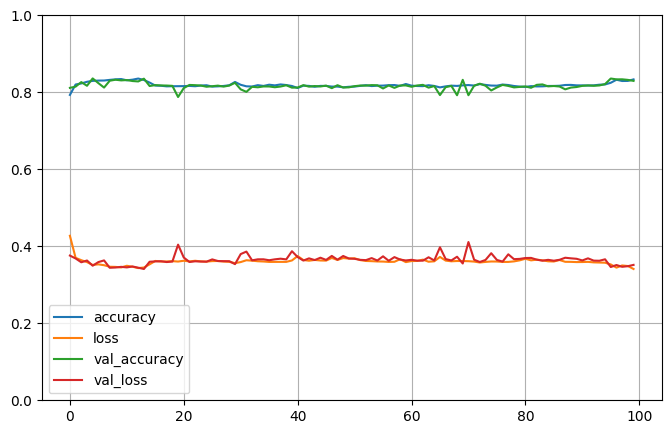

In [10]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
model.evaluate(X_test,y_test)

471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8254 - loss: 0.3547


[0.3516416549682617, 0.8295484781265259]

In [12]:
from sklearn import  metrics
y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
# metrics.accuracy_score(y_true= y_test, y_pred= model.predict(X_test))
print(accuracy)

471/471 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step
0.8295484727755644


# Zad

Porównaj powyższy wynik z nauką na danych znormalizowanych.

In [13]:
from sklearn.preprocessing import StandardScaler

history = History()
model = Sequential()
model.add(Dense(100,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(50,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

s = StandardScaler()
X_train_scaled = s.fit_transform(X_train.astype('float32'))
X_test_scaled = s.transform(X_test.astype('float32'))


# Reshape labels if necessary (for example, for categorical crossentropy)
y_train = np.expand_dims(y_train, axis=-1)
y_test = np.expand_dims(y_test, axis=-1)
history_scaled = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), batch_size=32, epochs=100)




D:\Anaconda\envs\experiments\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 100)            │         4,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,771 (38.17 KB)

 Trainable params: 9,771 (38.17 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6966 - loss: 0.5864 - val_accuracy: 0.8422 - val_loss: 0.3627
Epoch 2/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8424 - loss: 0.3556 - val_accuracy: 0.8461 - val_loss: 0.3426
Epoch 3/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8466 - loss: 0.3363 - val_accuracy: 0.8479 - val_loss: 0.3312
Epoch 4/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8486 - loss: 0.3276 - val_accuracy: 0.8479 - val_loss: 0.3271
Epoch 5/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8514 - loss: 0.3194 - val_accuracy: 0.8485 - val_loss: 0.3239
Epoch 6/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8515 - loss: 0.3214 - val_accuracy: 0.8507 - val_loss: 0.3242
Epoch 7/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8535 - loss: 0.3151 - val_accuracy: 0.8496 - val_loss: 0.3215
Epoch 8/100
943/943 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8501 - loss: 0.3203 - val_accu

In [14]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

model.evaluate(X_test,y_test)

y_pred = model.predict(X_test)

# Assuming a binary classification problem
y_pred = (y_pred > 0.5).astype(int)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(accuracy)

TypeError: no numeric data to plot

# Zad. 
Stwórz wykres porównujący metody. 

In [33]:
plt.figure(figsize=(10,8))
x = np.arange(0,len(history.history['accuracy']))
plt.plot(x,history.history['accuracy'])
plt.show()

KeyError: 'accuracy'

<Figure size 1000x800 with 0 Axes>